#  Project Machine Learning on Solar Flares from RHESSI Mission

# General theme: Astronomy

# Specific theme: Solar

From datasets:
    0. Solar and Lunar Eclipses (https://www.kaggle.com/nasa/solar-eclipses)
    1. Trappist-1 Solar System (https://www.kaggle.com/nasa/trappist1)
    2. Open Exoplanet Catalogue (https://www.kaggle.com/mrisdal/open-exoplanet-catalogue)
    3. Solar Flares from RHESSI Mission (https://www.kaggle.com/khsamaha/solar-flares-rhessi)
    4. Star Cluster Simulations (https://www.kaggle.com/mariopasquato/star-cluster-simulations)
    5. Exoplanet Hunting in Deep Space (https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data)

### I chose: 3. Solar Flares from RHESSI Mission (https://www.kaggle.com/khsamaha/solar-flares-rhessi)

### Because it was the most interesting with many observations

# Import the libraries

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, RANSACRegressor, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import LinearSVR, LinearSVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier

# Read

In [2]:
df=pd.read_csv("C:\\Users\\hp\\Downloads\\hessi.solar\\hessi.solar.flare.2002to2016.csv")

In [3]:
df.head()

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
3,2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
4,2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2


In [4]:
df.shape

(113942, 18)

# The columns are:

Description from Solar Flares from RHESSI Mission (https://www.kaggle.com/jmquintana/d/khsamaha/solar-flares-rhessi/solar-flares-from-rhessi-mission) and Description on Solar Flares from RHESSI Mission.txt

    0. Flare - An ID number
    1. Date - The date when the flare occurred
    2. Start - Flare start time
    3. Peak - Flare peak time
    4. End - Flare end time
    5. Dur[s] - Duration of flare in seconds
    6. Peak[c/s] - Peak count rate in corrected counts, peak counts/second
    7. Total Counts - Total of counts in corrected counts, counts in energy range
    8. Energy [keV] - The highest energy band in which the flare was observed.
    9. X pos [asec] - Flare position in arcsec from sun center
    10. Y pos [asec] - Flare position in arcsec from sun center
    11. Radial [asec] - Radial distance in arcsec from sun center
    12. Active Region [ar] - A number for the closest active region, if available
    13. Flags - Quality Codes
        * a0 - In attenuator state 0 (None) sometime during flare
        * a1 - In attenuator state 1 (Thin) sometime during flare
        * a2 - In attenuator state 2 (Thick) sometime during flare
        * a3 - In attenuator state 3 (Both) sometime during flare
        * An - Attenuator state (0=None, 1=Thin, 2=Thick, 3=Both) at peak of flare
        * DF - Front segment counts were decimated sometime during flare
        * DR - Rear segment counts were decimated sometime during flare
        * ED - Spacecraft eclipse (night) sometime during flare
        * EE - Flare ended in spacecraft eclipse (night)
        * ES - Flare started in spacecraft eclipse (night)
        * FE - Flare ongoing at end of file
        * FR - In Fast Rate Mode
        * FS - Flare ongoing at start of file
        * GD - Data gap during flare
        * GE - Flare ended in data gap
        * GS - Flare started in data gap
        * MR - Spacecraft in high-latitude zone during flare
        * NS - Non-solar event
        * PE - Particle event: Particles are present
        * PS - Possible Solar Flare; in front detectors, but no position
        * Pn - Position Quality: P0 = Position is NOT valid, P1 = Position is valid
        * Qn - Data Quality: Q0 = Highest Quality, Q11 = Lowest Quality
        * SD - Spacecraft was in SAA sometime during flare
        * SE - Flare ended when spacecraft was in SAA
        * SS - Flare started when spacecraft was in SAA

# Clean dataset

In [5]:
df_clean=df.drop(['flare','start.date','start.time','peak','end','active.region.ar','flag.1','flag.2','flag.3','flag.4','flag.5'],axis=1)

In [6]:
df_clean.columns=['duration_s','peak_c_s','total_counts','energy_kev','x_pos_asec','y_pos_asec','radial']
df_clean.head()

,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial
0,712,136,167304,12-25,592,-358,692
1,288,7,9504,6-12,604,-341,694
2,216,15,11448,6-12,-310,375,487
3,244,20,17400,12-25,-277,378,469
4,236,336,313392,25-50,-272,390,476


In [7]:
df_clean.isnull().sum()

duration_s      0
peak_c_s        0
total_counts    0
energy_kev      0
x_pos_asec      0
y_pos_asec      0
radial          0
dtype: int64

# Correlation between the data

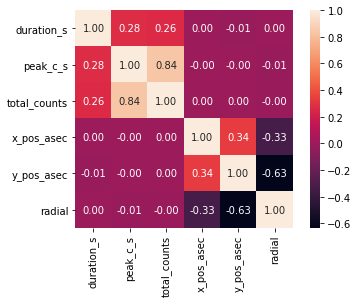

In [8]:
sns.heatmap(df_clean.corr(),annot=True, fmt=".2f",square=True)

I notice a linear dependence between total_counts and peak_c_s

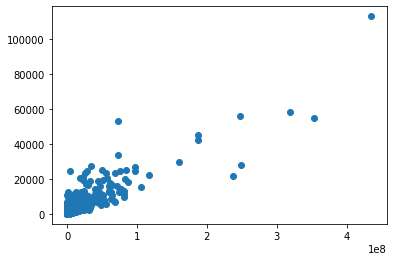

In [9]:
plt.scatter(df_clean['total_counts'],df_clean['peak_c_s'])

I notice clusters between x_pos_asec and y_pos_asec

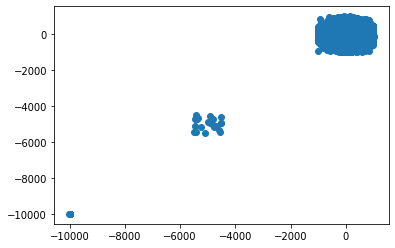

In [10]:
plt.scatter(df_clean['x_pos_asec'],df_clean['y_pos_asec'])

Let's look at clusters closely

Text(0.5, 1.0, 'The Big cluster')

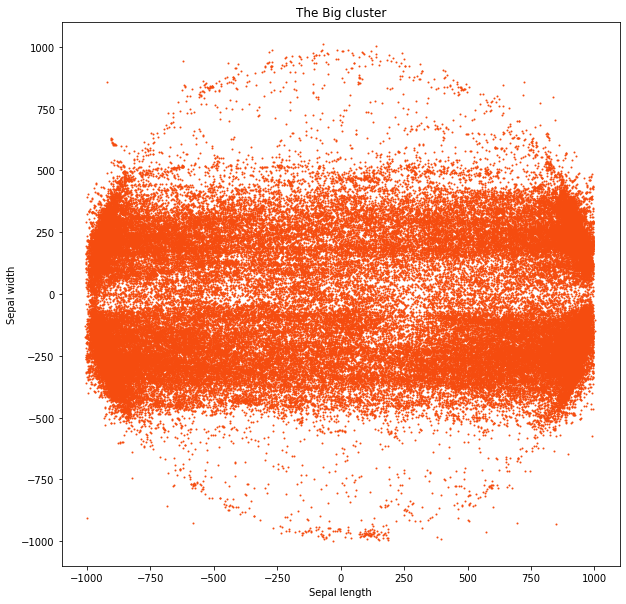

In [11]:
plt.figure(figsize=[10, 10])
plt.xlim(-1100, 1100)
plt.ylim(-1100, 1100)
plt.scatter(df_clean.x_pos_asec,df_clean.y_pos_asec, s=1, c='#F54C0F')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("The Big cluster")

This is the distribution of the eruptions on the sun

#  This picture is observed because:

Different parts of the sun rotate at different speeds: the gas at the equator rotates faster than does that at the poles. This differential rotation shears the gas and affects the Sun's magnetic field. As time goes on, the magnetic-field lines become highly distorted and twisted.

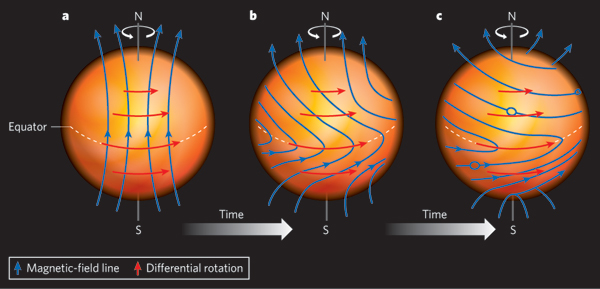

In [4]:
from IPython.display import Image
Image("The Sun's swirling magnetic field.jpg")

Text(0.5, 1.0, 'The Average cluster')

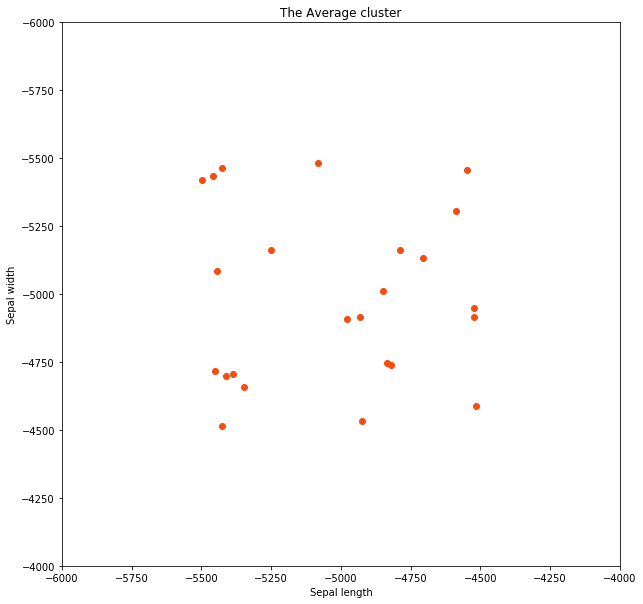

In [12]:
plt.figure(figsize=[10, 10])
plt.xlim(-6000, -4000)
plt.ylim(-4000, -6000)
plt.scatter(df_clean.x_pos_asec,df_clean.y_pos_asec,c='#F54C0F')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("The Average cluster")

Text(0.5, 1.0, 'The Small cluster')

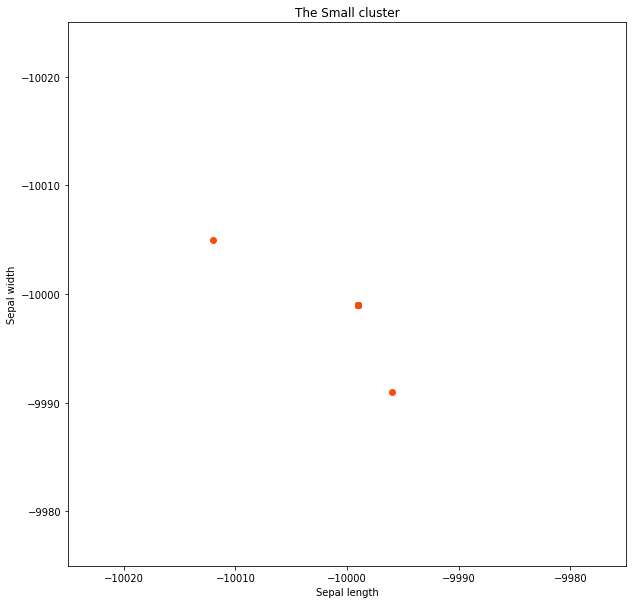

In [13]:
plt.figure(figsize=[10, 10])
plt.xlim(-10025, -9975)
plt.ylim(-9975, -10025)
plt.scatter(df_clean.x_pos_asec,df_clean.y_pos_asec,c='#F54C0F')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("The Small cluster")

In [14]:
df_clean['energy_kev'].value_counts()

6-12          85695
12-25         19364
3-6            6336
25-50          1944
50-100          407
100-300         181
300-800          12
800-7000          2
7000-20000        1
Name: energy_kev, dtype: int64

# Scaling the values

In [15]:
l=LabelEncoder()
df_clean.energy_kev=l.fit_transform(df_clean.energy_kev)
df_clean.head()

,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial
0,712,136,167304,1,592,-358,692
1,288,7,9504,6,604,-341,694
2,216,15,11448,6,-310,375,487
3,244,20,17400,1,-277,378,469
4,236,336,313392,2,-272,390,476


In [16]:
labels_classification_energy_kev = df_clean.energy_kev
labels_regression_total = df_clean.total_counts
attributes = df_clean.drop(["energy_kev"], axis = 1)
attributes.head()

,duration_s,peak_c_s,total_counts,x_pos_asec,y_pos_asec,radial
0,712,136,167304,592,-358,692
1,288,7,9504,604,-341,694
2,216,15,11448,-310,375,487
3,244,20,17400,-277,378,469
4,236,336,313392,-272,390,476


In [17]:
s=StandardScaler()
df_clean_ss=s.fit_transform(attributes)
#attributes_standardscaler = s.fit_transform(attributes)

In [18]:
df_clean_sss=pd.DataFrame(df_clean_ss,columns=attributes.columns)

In [19]:
df_clean_sss.head()

,duration_s,peak_c_s,total_counts,x_pos_asec,y_pos_asec,radial
0,0.505202,-0.091538,-0.068344,0.794902,-0.778330,0.004815
1,-0.473137,-0.246256,-0.119725,0.810754,-0.736308,0.008712
2,-0.639270,-0.236661,-0.119092,-0.396621,1.033578,-0.394639
3,-0.574663,-0.230664,-0.117154,-0.353029,1.040994,-0.429713
4,-0.593122,0.148336,-0.020777,-0.346424,1.070657,-0.416073


In [20]:
labels_regression_total_counts=df_clean_sss.total_counts
df_clean_dep=df_clean_sss.drop(['total_counts'],axis=1)

In [21]:
df_clean_dep.head()

,duration_s,peak_c_s,x_pos_asec,y_pos_asec,radial
0,0.505202,-0.091538,0.794902,-0.778330,0.004815
1,-0.473137,-0.246256,0.810754,-0.736308,0.008712
2,-0.639270,-0.236661,-0.396621,1.033578,-0.394639
3,-0.574663,-0.230664,-0.353029,1.040994,-0.429713
4,-0.593122,0.148336,-0.346424,1.070657,-0.416073


# Split the data for regression and for classification

In [22]:
x_train, x_test, y_train, y_test = train_test_split(df_clean_dep, labels_regression_total_counts, train_size = 0.7)
print("X_train_regression: ", x_train.shape)
print("X_test_regression:  ", x_test.shape)
print("y_train_regression: ", y_train.shape)
print("y_test_regression:  ", y_test.shape)

X_train_regression:  (79759, 5)
X_test_regression:   (34183, 5)
y_train_regression:  (79759,)
y_test_regression:   (34183,)


In [23]:
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(df_clean_dep, labels_classification_energy_kev, train_size = 0.7)
print("X_train_classification: ", X_train_classification.shape)
print("X_test_classification:  ", X_test_classification.shape)
print("y_train_classification: ", y_train_classification.shape)
print("y_test_classification:  ", y_test_classification.shape)

X_train_classification:  (79759, 5)
X_test_classification:   (34183, 5)
y_train_classification:  (79759,)
y_test_classification:   (34183,)


# Model 0: Linear regression

In [25]:
start = time.time()

lr = LinearRegression()
lr.fit(x_train, y_train)
LinearRegressionScore = lr.score(x_test, y_test)
print("LinearRegression Score: ", lr.score(x_test, y_test))

end = time.time()
linear_regression_time = end - start
print("Time: ", linear_regression_time)

LinearRegression Score:  0.7315722793851589
Time:  0.03572535514831543


In [26]:
start = time.time()

linear_regression = LinearRegression()
tuned_params = [{"fit_intercept":[True, False], "normalize":[True, False]}]
linear_regression_grid = GridSearchCV(linear_regression, tuned_params)
linear_regression_grid.fit(x_train, y_train)
print("Best Params: ", linear_regression_grid.best_params_)
LinearRegressionTuneScore = linear_regression_grid.score(x_test, y_test)
print("LinearRegression Tune Score: ", linear_regression_grid.score(x_test, y_test))

end = time.time()
linear_regression_grid_time = end - start
print("Time: ", linear_regression_grid_time)

Best Params:  {'fit_intercept': False, 'normalize': True}
LinearRegression Tune Score:  0.731573563558918
Time:  0.722161054611206


In [27]:
pd.DataFrame(linear_regression_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025347,0.003234,0.004548,0.002170,True,True,"{'fit_intercept': True, 'normalize': True}",0.755136,0.632915,0.583230,0.509901,0.555541,0.607345,0.083972,3
1,0.023700,0.006009,0.005018,0.006233,True,False,"{'fit_intercept': True, 'normalize': False}",0.755136,0.632915,0.583230,0.509901,0.555541,0.607345,0.083972,4
2,0.027625,0.005510,0.006815,0.007548,False,True,"{'fit_intercept': False, 'normalize': True}",0.755140,0.632921,0.583249,0.509902,0.555540,0.607351,0.083973,1
3,0.026338,0.006732,0.003124,0.006248,False,False,"{'fit_intercept': False, 'normalize': False}",0.755140,0.632921,0.583249,0.509902,0.555540,0.607351,0.083973,1


# Model 1: RansacRegressor

In [28]:
start = time.time()

ransac_regression = RANSACRegressor(base_estimator=LinearRegression())
ransac_regression.fit(x_train, y_train)
RANSACRegressorScore = ransac_regression.score(x_test, y_test)
print("RANSACRegressor with LinearRegression Score: ", ransac_regression.score(x_test, y_test))

end = time.time()
ransac_regression_time = end - start
print("Time: ", ransac_regression_time)

RANSACRegressor with LinearRegression Score:  0.25391898368350474
Time:  0.23281574249267578


In [70]:
start = time.time()

ransac_regression = RANSACRegressor(base_estimator=LinearRegression())
tuned_params = [{"min_samples":[20, 40, 50, 60, 80, 100], "max_trials":[20, 40, 50, 60, 80, 100], "residual_threshold":[2, 4, 5, 6, 8, 10]}]
ransac_regression_grid = GridSearchCV(ransac_regression, tuned_params)
ransac_regression_grid.fit(x_train, y_train)
print("Best Params: ", ransac_regression_grid.best_params_)
RANSACRegressorTuneScore =  ransac_regression_grid.score(x_test, y_test)
print("RANSACRegressor with LinearRegression Tune Score: ", ransac_regression_grid.score(x_test, y_test))

end = time.time()
ransac_regression_grid_time = end - start
print("Time: ", ransac_regression_grid_time)

Best Params:  {'max_trials': 40, 'min_samples': 100, 'residual_threshold': 10}
RANSACRegressor with LinearRegression Tune Score:  0.5821716760207105
Time:  77.72725367546082


# Model 2: Polynomial Regression

Polynomial regression degree=2

In [30]:
start = time.time()

quadratic = PolynomialFeatures(degree = 2)
X_train_regression_quadratic = quadratic.fit_transform(x_train)
X_test_regression_quadratic = quadratic.fit_transform(x_test)

linear_regression_quadratic = LinearRegression()
linear_regression_quadratic.fit(X_train_regression_quadratic, y_train)
PolynomialRegressionDegree2 = linear_regression_quadratic.score(X_test_regression_quadratic, y_test)
print("Polynomial Regression Degree = 2 Score: ", linear_regression_quadratic.score(X_test_regression_quadratic, y_test))

end = time.time()
linear_regression_quadratic_time = end - start
print("Time: ", linear_regression_quadratic_time)

Polynomial Regression Degree = 2 Score:  0.883032722996051
Time:  0.18619966506958008


Polynomial regression degree=3

In [31]:
start = time.time()

cubic = PolynomialFeatures(degree = 3)
X_train_regression_cubic = cubic.fit_transform(x_train)
X_test_regression_cubic = cubic.fit_transform(x_test)

linear_regression_cubic = LinearRegression()
linear_regression_cubic.fit(X_train_regression_cubic, y_train)
PolynomialRegressionDegree3 = linear_regression_cubic.score(X_test_regression_cubic, y_test)
print("Polynomial Regression Degree = 3 Score: ", linear_regression_cubic.score(X_test_regression_cubic, y_test))

end = time.time()
linear_regression_cubic_time = end - start
print("Time: ", linear_regression_cubic_time)

Polynomial Regression Degree = 3 Score:  0.6790637091725167
Time:  0.4660606384277344


Polynomial regression degree=4

In [32]:
start = time.time()

degree = PolynomialFeatures(degree = 4)
X_train_regression_degree = degree.fit_transform(x_train)
X_test_regression_degree = degree.fit_transform(x_test)

linear_regression_degree = LinearRegression()
linear_regression_degree.fit(X_train_regression_degree, y_train)
PolynomialRegressionDegree4 = linear_regression_degree.score(X_test_regression_degree, y_test)
print("Polynomial Regression Degree = 4 Score: ", linear_regression_degree.score(X_test_regression_degree, y_test))

end = time.time()
linear_regression_degree4_time = end - start
print("Time: ", linear_regression_degree4_time)

Polynomial Regression Degree = 4 Score:  -0.1825201737987845
Time:  1.0317392349243164


Polynomial regression degree=5

In [33]:
start = time.time()

degree = PolynomialFeatures(degree = 5)
X_train_regression_degree = degree.fit_transform(x_train)
X_test_regression_degree = degree.fit_transform(x_test)

linear_regression_degree = LinearRegression()
linear_regression_degree.fit(X_train_regression_degree, y_train)
PolynomialRegressionDegree5 = linear_regression_degree.score(X_test_regression_degree, y_test)
print("Polynomial Regression Degree = 5 Score: ", linear_regression_degree.score(X_test_regression_degree, y_test))

end = time.time()
linear_regression_degree5_time = end - start
print("Time: ", linear_regression_degree5_time)

Polynomial Regression Degree = 5 Score:  -2.5808222245516323
Time:  2.211519479751587


# Model 3: Logistic regression

In [34]:
start = time.time()

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_classification, y_train_classification)
LogisticRegressionScore = logistic_regression.score(X_test_classification, y_test_classification)
print("Logistic Regression Score: ", logistic_regression.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on Logistic Regression\n", confusion_matrix(y_test_classification, logistic_regression.predict(X_test_classification)))

end = time.time()
logistic_regression_time = end - start
print("Time: ", logistic_regression_time)

Logistic Regression Score:  0.8533774098235966

Confusion Matrix on Logistic Regression
 [[    0    30     7     0     1     2    10     0     0]
 [    0  2133     2    23     0     0  3641     0     0]
 [    4   330     5     0     2     1   263     0     0]
 [    0     0     0  1884     0     0     0     0     0]
 [    0     0     1     0     1     0     1     0     0]
 [    2    73     6     0     1     0    24     0     0]
 [    0   547     0    38     0     0 25148     0     0]
 [    0     0     0     0     0     0     1     0     0]
 [    0     0     0     0     0     0     2     0     0]]
Time:  13.37905240058899


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [35]:
start = time.time()

logistic_regression = LogisticRegression()
tuned_params = [{"C": [0.1, 1, 10, 100, 1000]}]
logistic_regression_grid = GridSearchCV(logistic_regression, tuned_params)
logistic_regression_grid.fit(X_train_classification, y_train_classification)
print("Best Params: ", logistic_regression_grid.best_params_)
LogisticRegressionTuneScore = logistic_regression_grid.score(X_test_classification, y_test_classification)
print("Logistic Regression Tune Score: ", logistic_regression_grid.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on Logistic Regression Tune\n", confusion_matrix(y_test_classification, logistic_regression_grid.predict(X_test_classification)))

end = time.time()
logistic_regression_time = end - start
print("Time: ", logistic_regression_time)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

Best Params:  {'C': 100}
Logistic Regression Tune Score:  0.8538454787467454

Confusion Matrix on Logistic Regression Tune
 [[    1    30     9     0     0     0    10     0     0]
 [    0  2134     2    14     0     0  3649     0     0]
 [    4   330     5     0     2     1   263     0     0]
 [    0     0     0  1884     0     0     0     0     0]
 [    1     0     1     0     0     0     1     0     0]
 [    3    73     6     0     0     0    24     0     0]
 [    0   547     0    23     0     0 25163     0     0]
 [    0     0     0     0     0     0     1     0     0]
 [    0     0     0     0     0     0     2     0     0]]
Time:  273.17330598831177


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Model 4: DecisionTreeRegressor

In [36]:
start = time.time()

decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(x_train, y_train)
DecisionTreeRegressorScore = decision_tree_regressor.score(x_test, y_test)
print("DecisionTreeRegressor Score: ", decision_tree_regressor.score(x_test, y_test))

end = time.time()
decision_tree_regressor_time = end - start
print("Time: ", decision_tree_regressor_time)

DecisionTreeRegressor Score:  0.7455525152163422
Time:  1.2571749687194824


In [37]:
start = time.time()

decision_tree_regressor = DecisionTreeRegressor()
tuned_params = [{"max_depth":[None, 1, 2, 3, 5, 10, 20], "min_samples_split":[2, 3, 5], "min_samples_leaf":[1, 2, 3, 5]}]
decision_tree_regressor_grid = GridSearchCV(decision_tree_regressor, tuned_params)
decision_tree_regressor_grid.fit(x_train, y_train)
print("Best Params: ", decision_tree_regressor_grid.best_params_)
DecisionTreeRegressorTuneScore = decision_tree_regressor_grid.score(x_test, y_test)
print("DecisionTreeRegressor Tune Score: ", decision_tree_regressor_grid.score(x_test, y_test))

end = time.time()
decision_tree_regressor_grid_time = end - start
print("Time: ", decision_tree_regressor_grid_time)

Best Params:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
DecisionTreeRegressor Tune Score:  0.7388776924806221
Time:  151.18824362754822


# Model 5: DecisionTreeClassifier

In [38]:
start = time.time()

decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_classification, y_train_classification)
DecisionTreeClassifierScore = decision_tree_classifier.score(X_test_classification, y_test_classification)
print("DecisionTreeClassifier Score: ", decision_tree_classifier.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on DecisionTreeClassifier\n", confusion_matrix(y_test_classification, decision_tree_classifier.predict(X_test_classification)))

end = time.time()
decision_tree_classifier_time = end - start
print("Time: ", decision_tree_classifier_time)

DecisionTreeClassifier Score:  0.7879355235058363

Confusion Matrix on DecisionTreeClassifier
 [[    3    24     6     0     0     6    11     0     0]
 [   36  2576   346     0     0    65  2776     0     0]
 [    5   299    57     0     2    19   223     0     0]
 [    0     0     0  1884     0     0     0     0     0]
 [    1     0     1     0     0     0     1     0     0]
 [    8    50    12     0     0     7    29     0     0]
 [   10  3001   285     0     0    30 22407     0     0]
 [    0     0     0     0     0     0     1     0     0]
 [    0     0     0     0     0     0     2     0     0]]
Time:  1.2231669425964355


In [39]:
start = time.time()

decision_tree_classifier = DecisionTreeClassifier()
tuned_params = [{"max_depth":[None, 1, 2, 3, 5, 10, 20]}]
decision_tree_classifier_grid = GridSearchCV(decision_tree_classifier, tuned_params)
decision_tree_classifier_grid.fit(X_train_classification, y_train_classification)
print("Best Params: ", decision_tree_classifier_grid.best_params_)
DecisionTreeClassifierTuneScore = decision_tree_classifier_grid.score(X_test_classification, y_test_classification)
print("DecisionTreeClassifier Tune Score: ", decision_tree_classifier_grid.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on DecisionTreeClassifier Tune\n", confusion_matrix(y_test_classification, decision_tree_classifier_grid.predict(X_test_classification)))

end = time.time()
decision_tree_classifier_grid_time = end - start
print("Time: ", decision_tree_classifier_grid_time)

Best Params:  {'max_depth': 5}
DecisionTreeClassifier Tune Score:  0.8605447152093145

Confusion Matrix on DecisionTreeClassifier Tune
 [[    1    32     9     0     0     0     8     0     0]
 [    0  2389     9     0     0     0  3401     0     0]
 [    6   323    15     0     0     0   261     0     0]
 [    0     0     0  1884     0     0     0     0     0]
 [    1     0     1     0     0     0     1     0     0]
 [    3    69     8     0     0     0    26     0     0]
 [    0   606     0     0     0     0 25127     0     0]
 [    0     0     0     0     0     0     1     0     0]
 [    0     0     0     0     0     0     2     0     0]]
Time:  13.497974872589111


# Model 6: RandomForestRegressor

In [40]:
start = time.time()

random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(x_train, y_train)
RandomForestRegressorScore = random_forest_regressor.score(x_test, y_test)
print("RandomForestRegressor Score: ", random_forest_regressor.score(x_test, y_test))

end = time.time()
random_forest_regressor_time = end - start
print("Time: ", random_forest_regressor_time)

RandomForestRegressor Score:  0.8448897587755876
Time:  74.5813422203064


In [41]:
start = time.time()

random_forest_regressor = RandomForestRegressor()
tuned_params = [{"n_estimators":[10, 20, 30, 40, 50]}]
random_forest_regressor_grid = GridSearchCV(random_forest_regressor, tuned_params)
random_forest_regressor_grid.fit(x_train, y_train)
print("Best Params: ", random_forest_regressor_grid.best_params_)
RandomForestRegressorTuneScore = random_forest_regressor_grid.score(x_test, y_test)
print("RandomForestRegressor Tune Score: ", random_forest_regressor_grid.score(x_test, y_test))

end = time.time()
random_forest_regressor_grid_time = end - start
print("Time: ", random_forest_regressor_grid_time)

Best Params:  {'n_estimators': 50}
RandomForestRegressor Tune Score:  0.8140532657939497
Time:  467.07840633392334


# Model 7: RandomForestClassifier

In [42]:
start = time.time()

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train_classification, y_train_classification)
RandomForestClassifierScore = random_forest_classifier.score(X_test_classification, y_test_classification)
print("RandomForestClassifier Score: ", random_forest_classifier.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on RandomForestClassifier\n", confusion_matrix(y_test_classification, random_forest_classifier.predict(X_test_classification)))

end = time.time()
random_forest_classifier_time = end - start
print("Time: ", random_forest_classifier_time)

RandomForestClassifier Score:  0.8575900301319369

Confusion Matrix on RandomForestClassifier
 [[    0    35     5     0     0     2     8     0     0]
 [    0  2813    10     0     0     2  2974     0     0]
 [    4   365    10     0     2     1   223     0     0]
 [    0     0     0  1884     0     0     0     0     0]
 [    1     0     0     0     1     0     1     0     0]
 [    3    70     7     0     0     0    26     0     0]
 [    0  1120     5     0     0     1 24607     0     0]
 [    0     0     0     0     0     0     1     0     0]
 [    0     0     0     0     0     0     2     0     0]]
Time:  37.11192035675049


In [43]:
start = time.time()

random_forest_classifier = RandomForestClassifier()
tuned_params = [{"n_estimators":[10, 20, 30, 40, 50]}]
random_forest_classifier_grid = GridSearchCV(random_forest_classifier, tuned_params)
random_forest_classifier_grid.fit(X_train_classification, y_train_classification)
print("Best Params: ", random_forest_classifier_grid.best_params_)
RandomForestClassifierTuneScore = random_forest_classifier_grid.score(X_test_classification, y_test_classification)
print("RandomForestClassifier Tune Score: ", random_forest_classifier_grid.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on RandomForestClassifier Tune\n", confusion_matrix(y_test_classification, random_forest_classifier_grid.predict(X_test_classification)))

end = time.time()
random_forest_classifier_grid_time = end - start
print("Time: ", random_forest_classifier_grid_time)

Best Params:  {'n_estimators': 40}
RandomForestClassifier Tune Score:  0.856361349208671

Confusion Matrix on RandomForestClassifier Tune
 [[    0    34     6     0     0     3     7     0     0]
 [    0  2856    12     0     0     4  2927     0     0]
 [    3   378    12     0     2     2   208     0     0]
 [    0     0     0  1884     0     0     0     0     0]
 [    1     1     0     0     0     0     1     0     0]
 [    2    72     7     0     0     1    24     0     0]
 [    0  1208     5     0     0     0 24520     0     0]
 [    0     0     0     0     0     0     1     0     0]
 [    0     0     0     0     0     0     2     0     0]]
Time:  199.3690800666809


# Model 8: AdaBoostRegressor()

In [44]:
start = time.time()

ada_boost_regressor = AdaBoostRegressor()
ada_boost_regressor.fit(x_train, y_train)
AdaBoostRegressorScore =  ada_boost_regressor.score(x_test, y_test)
print("AdaBoostRegressor Score: ", ada_boost_regressor.score(x_test, y_test))

end = time.time()
ada_boost_regressor_time = end - start
print("Time: ", ada_boost_regressor_time)

AdaBoostRegressor Score:  -0.10660438093242819
Time:  5.600380897521973


In [45]:
start = time.time()

ada_boost_regressor = AdaBoostRegressor()
tuned_params = [{"n_estimators":[10, 20, 30, 40, 50]}]
ada_boost_regressor_grid = GridSearchCV(ada_boost_regressor, tuned_params)
ada_boost_regressor_grid.fit(x_train, y_train)
print("Best Params: ", ada_boost_regressor_grid.best_params_)
AdaBoostRegressorTuneScore = ada_boost_regressor_grid.score(x_test, y_test)
print("AdaBoostRegressor Tune Score: ", ada_boost_regressor_grid.score(x_test, y_test))

end = time.time()
ada_boost_regressor_grid_time = end - start
print("Time: ", ada_boost_regressor_grid_time)

Best Params:  {'n_estimators': 20}
AdaBoostRegressor Tune Score:  0.706068293572049
Time:  70.33757829666138


# Model 9: AdaBoostClassifier()

In [46]:
start = time.time()

ada_boost_classifier = AdaBoostClassifier()
ada_boost_classifier.fit(X_train_classification, y_train_classification)
AdaBoostClassifierScore = ada_boost_classifier.score(X_test_classification, y_test_classification)
print("AdaBoostClassifier Score: ", ada_boost_classifier.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on AdaBoostClassifier\n", confusion_matrix(y_test_classification, ada_boost_classifier.predict(X_test_classification)))

end = time.time()
ada_boost_classifier_time = end - start
print("Time: ", ada_boost_classifier_time)

AdaBoostClassifier Score:  0.7724892490419214

Confusion Matrix on AdaBoostClassifier
 [[    0    19     3     0     1     5    22     0     0]
 [    0   617     0     0     3     0  5179     0     0]
 [    0   142     9     0     4     3   447     0     0]
 [ 1669     0     0   215     0     0     0     0     0]
 [    0     0     0     0     1     1     1     0     0]
 [    0    38     6     0     1     2    59     0     0]
 [    0    91     0     0    80     0 25562     0     0]
 [    0     0     0     0     0     0     1     0     0]
 [    0     0     0     0     0     0     2     0     0]]
Time:  7.821686744689941


In [47]:
start = time.time()

ada_boost_classifier = AdaBoostClassifier()
tuned_params = [{"n_estimators":[10, 20, 30, 40, 50]}]
ada_boost_classifier_grid = GridSearchCV(ada_boost_classifier, tuned_params)
ada_boost_classifier_grid.fit(X_train_classification, y_train_classification)
print("Best Params: ", ada_boost_classifier_grid.best_params_)
AdaBoostClassifierTuneScore = ada_boost_classifier_grid.score(X_test_classification, y_test_classification)
print("AdaBoostClassifier Tune Score: ", ada_boost_classifier_grid.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on AdaBoostClassifier Tune\n", confusion_matrix(y_test_classification, ada_boost_classifier_grid.predict(X_test_classification)))

end = time.time()
ada_boost_classifier_grid_time = end - start
print("Time: ", ada_boost_classifier_grid_time)

Best Params:  {'n_estimators': 20}
AdaBoostClassifier Tune Score:  0.774537050580698

Confusion Matrix on AdaBoostClassifier Tune
 [[    1    27     0     0     0     0    22     0     0]
 [    0   617     0     0     1     0  5181     0     0]
 [    1   153     0     0     4     0   447     0     0]
 [ 1669     0     0   215     0     0     0     0     0]
 [    0     1     0     0     1     0     1     0     0]
 [    2    44     0     0     1     0    59     0     0]
 [    0    91     0     0     0     0 25642     0     0]
 [    0     0     0     0     0     0     1     0     0]
 [    0     0     0     0     0     0     2     0     0]]
Time:  79.07112240791321


# Model 10: Support Vector Machines - Linear Support Vector Regression

In [48]:
start = time.time()

linear_svr = LinearSVR()
linear_svr.fit(x_train, y_train)
LinearSVRScore = linear_svr.score(x_test, y_test)
print("LinearSVR Score: ", linear_svr.score(x_test, y_test))

end = time.time()
linear_svr_time = end - start
print("Time: ", linear_svr_time)

LinearSVR Score:  0.4527843719140881
Time:  15.677706003189087


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [49]:
start = time.time()

linear_svr = LinearSVR()
tuned_params = [{"C":[0.01, 0.1, 1.0, 10, 100]}]
linear_svr_grid = GridSearchCV(linear_svr, tuned_params)
linear_svr_grid.fit(x_train, y_train)
print("Best Params: ", linear_svr_grid.best_params_)
LinearSVRTuneScore = linear_svr_grid.score(x_test, y_test)
print("LinearSVR Tune Score: ", linear_svr_grid.score(x_test, y_test))

end = time.time()
linear_svr_grid_time = end - start
print("Time: ", linear_svr_grid_time)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Convergenc

Best Params:  {'C': 100}
LinearSVR Tune Score:  0.424168665218972
Time:  296.0601706504822


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Model 11 - Support Vector Machines - Linear Support Vector Classification

In [50]:
start = time.time()

linear_svc = LinearSVC()
linear_svc.fit(X_train_classification, y_train_classification)
LinearSVCScore = linear_svc.score(X_test_classification, y_test_classification)
print("LinearSVC Score: ", linear_svc.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on LinearSVC\n", confusion_matrix(y_test_classification, linear_svc.predict(X_test_classification)))

end = time.time()
linear_svc_time = end - start
print("Time: ", linear_svc_time)

LinearSVC Score:  0.8395401222830061

Confusion Matrix on LinearSVC
 [[    0    38     0     0     0     0    12     0     0]
 [    0  1409     0     7     0     0  4383     0     0]
 [    0   269     0     0     0     0   336     0     0]
 [    0     2     0  1882     0     0     0     0     0]
 [    0     2     0     0     0     0     1     0     0]
 [    0    76     0     0     0     0    30     0     0]
 [    0   313     0    13     0     0 25407     0     0]
 [    0     0     0     0     0     0     1     0     0]
 [    0     0     0     0     0     0     2     0     0]]
Time:  83.71063470840454


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [51]:
# start = time.time()

# linear_svc = LinearSVC()
# tuned_params = [{"C":[0.01, 0.1, 1.0, 10, 100]}]
# linear_svc_grid = GridSearchCV(linear_svc, tuned_params)
# linear_svc_grid.fit(X_train_classification, y_train_classification)
# print("Best Params: ", linear_svc_grid.best_params_)
# print("LinearSVC Tune Score: ", linear_svc_grid.score(X_test_classification, y_test_classification))
# print("\nConfusion Matrix on LinearSVC Tune\n", confusion_matrix(y_test_classification, linear_svc_grid.predict(X_test_classification)))

# end = time.time()
# linear_svc_grid_time = end - start
# print("Time: ", linear_svc_grid_time)

# Model 12: KNeighborsRegressor

In [52]:
start = time.time()

k_neighbors_regressor = KNeighborsRegressor()
k_neighbors_regressor.fit(x_train, y_train)
KNeighborsRegressorScore = k_neighbors_regressor.score(x_test, y_test)
print("KNeighborsRegressor Score: ", k_neighbors_regressor.score(x_test, y_test))

end = time.time()
k_neighbors_regressor_time = end - start
print("Time: ", k_neighbors_regressor_time)

KNeighborsRegressor Score:  0.7799361323039862
Time:  2.070984363555908


In [53]:
start = time.time()

k_neighbors_regressor = KNeighborsRegressor()
tuned_params = [{"n_neighbors":[2, 4, 6, 8, 10, 15]}]
k_neighbors_regressor_grid = GridSearchCV(k_neighbors_regressor, tuned_params)
k_neighbors_regressor_grid.fit(x_train, y_train)
print("Best Params: ", k_neighbors_regressor_grid.best_params_)
KNeighborsRegressorTuneScore = k_neighbors_regressor_grid.score(x_test, y_test)
print("KNeighborsRegressor Tune Score: ", k_neighbors_regressor_grid.score(x_test, y_test))

end = time.time()
k_neighbors_regressor_grid_time = end - start
print("Time: ", k_neighbors_regressor_grid_time)

Best Params:  {'n_neighbors': 2}
KNeighborsRegressor Tune Score:  0.7624978461949513
Time:  27.154025316238403


# Model 13: KNeighborsClassifier

In [54]:
start = time.time()

k_neighbors_classifier = KNeighborsClassifier()
k_neighbors_classifier.fit(X_train_classification, y_train_classification)
KNeighborsClassifierScore = k_neighbors_classifier.score(X_test_classification, y_test_classification)
print("KNeighborsClassifier Score: ", k_neighbors_classifier.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on KNeighborsClassifier\n", confusion_matrix(y_test_classification, k_neighbors_classifier.predict(X_test_classification)))

end = time.time()
k_neighbors_classifier_time = end - start
print("Time: ", k_neighbors_classifier_time)

KNeighborsClassifier Score:  0.8456542725916392

Confusion Matrix on KNeighborsClassifier
 [[    2    32     7     0     1     0     8     0     0]
 [    6  2685    49    39     0     4  3016     0     0]
 [    4   360    16     8     2     2   213     0     0]
 [    0     3     2  1879     0     0     0     0     0]
 [    0     0     2     0     0     0     1     0     0]
 [    3    68    11     0     0     0    24     0     0]
 [    1  1352    29    24     0     2 24325     0     0]
 [    0     0     0     0     0     0     1     0     0]
 [    0     0     0     0     0     0     2     0     0]]
Time:  7.578229665756226


In [55]:
start = time.time()

k_neighbors_classifier = KNeighborsClassifier()
tuned_params = [{"n_neighbors":[2, 4, 6, 8, 10, 15]}]
k_neighbors_classifier_grid = GridSearchCV(k_neighbors_classifier, tuned_params)
k_neighbors_classifier_grid.fit(X_train_classification, y_train_classification)
print("Best Params: ", k_neighbors_classifier_grid.best_params_)
KNeighborsClassifierTuneScore =  k_neighbors_classifier_grid.score(X_test_classification, y_test_classification)
print("KNeighborsClassifier Tune Score: ", k_neighbors_classifier_grid.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on KNeighborsClassifier Tune\n", confusion_matrix(y_test_classification, k_neighbors_classifier_grid.predict(X_test_classification)))

end = time.time()
k_neighbors_classifier_grid_time = end - start
print("Time: ", k_neighbors_classifier_grid_time)

Best Params:  {'n_neighbors': 15}
KNeighborsClassifier Tune Score:  0.8554252113623732

Confusion Matrix on KNeighborsClassifier Tune
 [[    1    33     5     0     0     3     8     0     0]
 [    0  2597     6    47     0     0  3149     0     0]
 [    5   355    11     6     0     1   227     0     0]
 [    0     6     2  1876     0     0     0     0     0]
 [    1     0     1     0     0     0     1     0     0]
 [    3    74     6     0     0     0    23     0     0]
 [    0   925     1    50     0     1 24756     0     0]
 [    0     0     0     0     0     0     1     0     0]
 [    0     0     0     0     0     0     2     0     0]]
Time:  59.32105302810669


# Model 14:  MLPRegressor

In [56]:
start = time.time()

mlp_regressor = MLPRegressor()
mlp_regressor.fit(x_train, y_train)
MLPRegressorDefaultScore = mlp_regressor.score(x_test, y_test)
print("MLPRegressor Default Score: ", mlp_regressor.score(x_test, y_test))

end = time.time()
mlp_regressor_time = end - start
print("Time: ", mlp_regressor_time)

MLPRegressor Default Score:  0.8663191414661886
Time:  24.33216118812561


In [57]:
start = time.time()

mlp_regressor_architecture_1 = MLPRegressor(hidden_layer_sizes=(50, 30, 20))
mlp_regressor_architecture_1.fit(x_train, y_train)
MLPRegressor1 = mlp_regressor_architecture_1.score(x_test, y_test)
print("MLPRegressor Architecture 1 (50, 30, 20) Score: ", mlp_regressor_architecture_1.score(x_test, y_test))

end = time.time()
mlp_regressor_architecture_1_time = end - start
print("Time: ", mlp_regressor_architecture_1_time)

MLPRegressor Architecture 1 (50, 30, 20) Score:  0.8077804304297087
Time:  73.09368181228638


In [58]:
start = time.time()

mlp_regressor_architecture_2 = MLPRegressor(hidden_layer_sizes=(20, 30, 50))
mlp_regressor_architecture_2.fit(x_train, y_train)
MLPRegressor2 = mlp_regressor_architecture_2.score(x_test, y_test)
print("MLPRegressor Architecture 2 (20, 30, 50) Score: ", mlp_regressor_architecture_2.score(x_test, y_test))

end = time.time()
mlp_regressor_architecture_2_time = end - start
print("Time: ", mlp_regressor_architecture_2_time)

MLPRegressor Architecture 2 (20, 30, 50) Score:  0.8622968548984106
Time:  84.84848189353943


In [59]:
start = time.time()

mlp_regressor_architecture_3 = MLPRegressor(hidden_layer_sizes=(30, 50, 30))
mlp_regressor_architecture_3.fit(x_train, y_train)
MLPRegressor3 = mlp_regressor_architecture_3.score(x_test, y_test)
print("MLPRegressor Architecture 3 (30, 50, 30) Score: ", mlp_regressor_architecture_3.score(x_test, y_test))

end = time.time()
mlp_regressor_architecture_3_time = end - start
print("Time: ", mlp_regressor_architecture_3_time)

MLPRegressor Architecture 3 (30, 50, 30) Score:  0.8421800728053757
Time:  80.30050754547119


In [60]:
start = time.time()

mlp_regressor_architecture_4 = MLPRegressor(hidden_layer_sizes=(1000, ))
mlp_regressor_architecture_4.fit(x_train, y_train)
MLPRegressor4 = mlp_regressor_architecture_4.score(x_test, y_test)
print("MLPRegressor Architecture 4 (1000, ) Score: ", mlp_regressor_architecture_4.score(x_test, y_test))

end = time.time()
mlp_regressor_architecture_4_time = end - start
print("Time: ", mlp_regressor_architecture_4_time)

MLPRegressor Architecture 4 (1000, ) Score:  0.8556295176600239
Time:  382.5641174316406


In [61]:
start = time.time()

mlp_regressor_architecture_5 = MLPRegressor(hidden_layer_sizes=(100, 100))
mlp_regressor_architecture_5.fit(x_train, y_train)
MLPRegressor5 = mlp_regressor_architecture_5.score(x_test, y_test)
print("MLPRegressor Architecture 5 (100, 100) Score: ", mlp_regressor_architecture_5.score(x_test, y_test))

end = time.time()
mlp_regressor_architecture_5_time = end - start
print("Time: ", mlp_regressor_architecture_5_time)

MLPRegressor Architecture 5 (100, 100) Score:  0.8703931083968017
Time:  145.48222827911377


# Model 15: MLPClassifier

In [62]:
start = time.time()

mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train_classification, y_train_classification)
MLPClassifierDefaultScore = mlp_classifier.score(X_test_classification, y_test_classification)
print("MLPClassifier Default Score: ", mlp_classifier.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on MLPClassifier Default\n", confusion_matrix(y_test_classification, mlp_classifier.predict(X_test_classification)))

end = time.time()
mlp_classifier_time = end - start
print("Time: ", mlp_classifier_time)

MLPClassifier Default Score:  0.8609250212093731

Confusion Matrix on MLPClassifier Default
 [[    1    34     8     0     0     0     7     0     0]
 [    0  2882     5     2     0     0  2910     0     0]
 [    3   369    11     0     2     1   219     0     0]
 [    0     0     0  1884     0     0     0     0     0]
 [    1     0     1     0     0     0     1     0     0]
 [    4    74     5     0     0     0    23     0     0]
 [    0  1074     1     7     0     0 24651     0     0]
 [    0     0     0     0     0     0     1     0     0]
 [    0     0     0     0     0     0     2     0     0]]
Time:  160.70826816558838


In [63]:
start = time.time()

mlp_classifier_architecture_1 = MLPClassifier(hidden_layer_sizes=(50, 30, 20))
mlp_classifier_architecture_1.fit(X_train_classification, y_train_classification)
MLPClassifier1 = mlp_classifier_architecture_1.score(X_test_classification, y_test_classification)
print("MLPClassifier Architecture 1 (50, 30, 20) Score: ", mlp_classifier_architecture_1.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on MLPClassifier Architecture 1 (50, 30, 20)\n", confusion_matrix(y_test_classification, mlp_classifier_architecture_1.predict(X_test_classification)))

end = time.time()
mlp_classifier_architecture_1_time = end - start
print("Time: ", mlp_classifier_architecture_1_time)

MLPClassifier Architecture 1 (50, 30, 20) Score:  0.8620659392095487

Confusion Matrix on MLPClassifier Architecture 1 (50, 30, 20)
 [[    0    34     8     0     1     1     6     0     0]
 [    0  2927    10     1     0     1  2860     0     0]
 [    1   380    20     1     2     2   199     0     0]
 [    0     0     0  1884     0     0     0     0     0]
 [    0     0     2     0     0     0     1     0     0]
 [    3    73     8     0     0     0    22     0     0]
 [    0  1091     2     3     0     0 24637     0     0]
 [    0     0     0     0     0     0     1     0     0]
 [    0     0     0     0     0     0     2     0     0]]
Time:  346.5629119873047


In [64]:
start = time.time()

mlp_classifier_architecture_2 = MLPClassifier(hidden_layer_sizes=(20, 30, 50))
mlp_classifier_architecture_2.fit(X_train_classification, y_train_classification)
MLPClassifier2 = mlp_classifier_architecture_2.score(X_test_classification, y_test_classification)
print("MLPClassifier Architecture 2 (20, 30, 50) Score: ", mlp_classifier_architecture_2.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on MLPClassifier Architecture 2 (20, 30, 50)\n", confusion_matrix(y_test_classification, mlp_classifier_architecture_2.predict(X_test_classification)))

end = time.time()
mlp_classifier_architecture_2_time = end - start
print("Time: ", mlp_classifier_architecture_2_time)

MLPClassifier Architecture 2 (20, 30, 50) Score:  0.8615686159787028

Confusion Matrix on MLPClassifier Architecture 2 (20, 30, 50)
 [[    1    35     3     0     0     4     7     0     0]
 [    0  2850     2     4     0     0  2943     0     0]
 [    5   365     8     0     0     1   226     0     0]
 [    0     0     0  1884     0     0     0     0     0]
 [    1     0     1     0     0     0     1     0     0]
 [    3    74     5     0     0     1    23     0     0]
 [    0  1023     0     3     0     0 24707     0     0]
 [    0     0     0     0     0     0     1     0     0]
 [    0     0     0     0     0     0     2     0     0]]
Time:  195.6533875465393


In [65]:
start = time.time()

mlp_classifier_architecture_3 = MLPClassifier(hidden_layer_sizes=(30, 50, 30))
mlp_classifier_architecture_3.fit(X_train_classification, y_train_classification)
MLPClassifier3 = mlp_classifier_architecture_3.score(X_test_classification, y_test_classification)
print("MLPClassifier Architecture 3 (30, 50, 30) Score: ", mlp_classifier_architecture_3.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on MLPClassifier Architecture 3 (30, 50, 30)\n", confusion_matrix(y_test_classification, mlp_classifier_architecture_3.predict(X_test_classification)))

end = time.time()
mlp_classifier_architecture_3_time = end - start
print("Time: ", mlp_classifier_architecture_3_time)

MLPClassifier Architecture 3 (30, 50, 30) Score:  0.8620659392095487

Confusion Matrix on MLPClassifier Architecture 3 (30, 50, 30)
 [[    1    33     7     0     0     1     8     0     0]
 [    0  2782    11     1     0     1  3004     0     0]
 [    1   346    15     0     3     1   239     0     0]
 [    0     0     0  1884     0     0     0     0     0]
 [    0     0     1     0     1     0     1     0     0]
 [    3    73     7     0     0     0    23     0     0]
 [    0   946     0     2     0     0 24785     0     0]
 [    0     0     0     0     0     0     1     0     0]
 [    0     0     0     0     0     0     2     0     0]]
Time:  394.3287842273712


In [66]:
start = time.time()

mlp_classifier_architecture_4 = MLPClassifier(hidden_layer_sizes=(1000, ))
mlp_classifier_architecture_4.fit(X_train_classification, y_train_classification)
MLPClassifier4 = mlp_classifier_architecture_4.score(X_test_classification, y_test_classification)
print("MLPClassifier Architecture 4 (1000, ) Score: ", mlp_classifier_architecture_4.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on MLPClassifier Architecture 4 (1000, )\n", confusion_matrix(y_test_classification, mlp_classifier_architecture_4.predict(X_test_classification)))

end = time.time()
mlp_classifier_architecture_4_time = end - start
print("Time: ", mlp_classifier_architecture_4_time)

MLPClassifier Architecture 4 (1000, ) Score:  0.8614808530556124

Confusion Matrix on MLPClassifier Architecture 4 (1000, )
 [[    1    34     4     0     0     3     8     0     0]
 [    0  2764     2     2     0     2  3029     0     0]
 [    0   354     9     0     2     1   239     0     0]
 [    0     0     1  1883     0     0     0     0     0]
 [    0     0     2     0     0     0     1     0     0]
 [    1    71     8     0     0     0    26     0     0]
 [    0   933     1     8     0     0 24791     0     0]
 [    0     0     0     0     0     0     1     0     0]
 [    0     0     0     0     0     0     2     0     0]]
Time:  1243.8889174461365


In [69]:
start = time.time()

mlp_classifier_architecture_5 = MLPClassifier(hidden_layer_sizes=(100, 100))
mlp_classifier_architecture_5.fit(X_train_classification, y_train_classification)
MLPClassifier5 = mlp_classifier_architecture_5.score(X_test_classification, y_test_classification)
print("MLPClassifier Architecture 5 (100, 100) Score: ", mlp_classifier_architecture_5.score(X_test_classification, y_test_classification))
print("\nConfusion Matrix on MLPClassifier Architecture 5 (100, 100)\n", confusion_matrix(y_test_classification, mlp_classifier_architecture_5.predict(X_test_classification)))

end = time.time()
mlp_classifier_architecture_5_time = end - start
print("Time: ", mlp_classifier_architecture_5_time)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier Architecture 5 (100, 100) Score:  0.8603691893631337

Confusion Matrix on MLPClassifier Architecture 5 (100, 100)
 [[    3    32     4     0     0     1    10     0     0]
 [    0  2745     8     1     0     4  3041     0     0]
 [    5   361     7     0     2     1   229     0     0]
 [    0     0     0  1884     0     0     0     0     0]
 [    1     0     1     0     0     0     1     0     0]
 [    6    71     5     0     0     0    24     0     0]
 [    0   952     2     5     0     3 24771     0     0]
 [    0     0     0     0     0     0     1     0     0]
 [    0     0     0     0     0     0     2     0     0]]
Time:  667.6862003803253


#  I will compare the models and choose the simplest and workable model

# For Regression

In [71]:
print("LinearRegression Score: ",LinearRegressionScore )
print("Time: ", linear_regression_time)

print("\n")

print("LinearRegression Tune Score: ", LinearRegressionTuneScore)
print("Time: ", linear_regression_grid_time)

print("\n_______________________________\n")

print("RANSACRegressor with LinearRegression Score: ", RANSACRegressorScore )
print("Time: ", ransac_regression_time)

print("\n")

print("RANSACRegressor with LinearRegression Tune Score: ", RANSACRegressorTuneScore)
print("Time: ", ransac_regression_grid_time)

print("\n_______________________________\n")

print("Polynomial Regression Degree = 2 Score: ", PolynomialRegressionDegree2)
print("Time: ", linear_regression_quadratic_time)

print("\n")

print("Polynomial Regression Degree = 3 Score: ", PolynomialRegressionDegree3)
print("Time: ", linear_regression_cubic_time)

print("\n")

print("Polynomial Regression Degree = 4 Score: ", PolynomialRegressionDegree4)
print("Time: ", linear_regression_degree4_time)

print("\n")

print("Polynomial Regression Degree = 5 Score: ", PolynomialRegressionDegree5)
print("Time: ", linear_regression_degree5_time)

print("\n_______________________________\n")

print("DecisionTreeRegressor Score: ", DecisionTreeRegressorScore)
print("Time: ", decision_tree_regressor_time)

print("\n")

print("DecisionTreeRegressor Tune Score: ", DecisionTreeRegressorTuneScore)
print("Time: ", decision_tree_regressor_grid_time)

print("\n_______________________________\n")

print("RandomForestRegressor Score: ", RandomForestRegressorScore)
print("Time: ", random_forest_regressor_time)

print("\n")

print("RandomForestRegressor Tune Score: ", RandomForestRegressorTuneScore)
print("Time: ", random_forest_regressor_grid_time)

print("\n_______________________________\n")

print("AdaBoostRegressor Score: ", AdaBoostRegressorScore)
print("Time: ", ada_boost_regressor_time)

print("\n")

print("AdaBoostRegressor Tune Score: ", AdaBoostRegressorTuneScore)
print("Time: ", ada_boost_regressor_grid_time)

print("\n_______________________________\n")

print("LinearSVR Score: ", LinearSVRScore)
print("Time: ", linear_svr_time)

print("\n")

print("LinearSVR Tune Score: ", LinearSVRTuneScore)
print("Time: ", linear_svr_grid_time)

print("\n_______________________________\n")

print("KNeighborsRegressor Score: ", KNeighborsRegressorScore)
print("Time: ", k_neighbors_regressor_time)

print("\n")

print("KNeighborsRegressor Tune Score: ", KNeighborsRegressorTuneScore)
print("Time: ", k_neighbors_regressor_grid_time)

print("\n_______________________________\n")

print("MLPRegressor Default Score: ", MLPRegressorDefaultScore)
print("Time: ", mlp_regressor_time)

print("\n")

print("MLPRegressor Architecture 1 (50, 30, 20) Score: ", MLPRegressor1)
print("Time: ", mlp_regressor_architecture_1_time)

print("\n")

print("MLPRegressor Architecture 2 (20, 30, 50) Score: ", MLPRegressor2)
print("Time: ", mlp_regressor_architecture_2_time)

print("\n")

print("MLPRegressor Architecture 3 (30, 50, 30) Score: ", MLPRegressor3)
print("Time: ", mlp_regressor_architecture_3_time)

print("\n")

print("MLPRegressor Architecture 4 (1000, ) Score: ", MLPRegressor4)
print("Time: ", mlp_regressor_architecture_4_time)

print("\n")

print("MLPRegressor Architecture 5 (100, 100) Score: ", MLPRegressor5)
print("Time: ", mlp_regressor_architecture_5_time)

LinearRegression Score:  0.7315722793851589
Time:  0.03572535514831543


LinearRegression Tune Score:  0.731573563558918
Time:  0.722161054611206

_______________________________

RANSACRegressor with LinearRegression Score:  0.25391898368350474
Time:  0.23281574249267578


RANSACRegressor with LinearRegression Tune Score:  0.5821716760207105
Time:  77.72725367546082

_______________________________

Polynomial Regression Degree = 2 Score:  0.883032722996051
Time:  0.18619966506958008


Polynomial Regression Degree = 3 Score:  0.6790637091725167
Time:  0.4660606384277344


Polynomial Regression Degree = 4 Score:  -0.1825201737987845
Time:  1.0317392349243164


Polynomial Regression Degree = 5 Score:  -2.5808222245516323
Time:  2.211519479751587

_______________________________

DecisionTreeRegressor Score:  0.7455525152163422
Time:  1.2571749687194824


DecisionTreeRegressor Tune Score:  0.7388776924806221
Time:  151.18824362754822

_______________________________

RandomForestRegresso

# For Regression

In [75]:
print("Logistic Regression Score: ", LogisticRegressionScore)
#print("\nConfusion Matrix on Logistic Regression\n", confusion_matrix(y_test_classification, logistic_regression.predict(X_test_classification)))
print("Time: ", logistic_regression_time)

print("\n")

print("Logistic Regression Tune Score: ", LogisticRegressionTuneScore)
#print("\nConfusion Matrix on Logistic Regression Tune\n", confusion_matrix(y_test_classification, logistic_regression_grid.predict(X_test_classification)))
print("Time: ", logistic_regression_time)

print("\n_______________________________\n")

print("DecisionTreeClassifier Score: ", DecisionTreeClassifierScore)
#print("\nConfusion Matrix on DecisionTreeClassifier\n", confusion_matrix(y_test_classification, decision_tree_classifier.predict(X_test_classification)))
print("Time: ", decision_tree_classifier_time)

print("\n")

print("DecisionTreeClassifier Tune Score: ", DecisionTreeClassifierTuneScore)
#print("\nConfusion Matrix on DecisionTreeClassifier Tune\n", confusion_matrix(y_test_classification, decision_tree_classifier_grid.predict(X_test_classification)))
print("Time: ", decision_tree_classifier_grid_time)

print("\n_______________________________\n")

print("RandomForestClassifier Score: ", RandomForestClassifierScore)
#print("\nConfusion Matrix on RandomForestClassifier\n", confusion_matrix(y_test_classification, random_forest_classifier.predict(X_test_classification)))
print("Time: ", random_forest_classifier_time)

print("\n")

print("RandomForestClassifier Tune Score: ", RandomForestClassifierTuneScore)
#print("\nConfusion Matrix on RandomForestClassifier Tune\n", confusion_matrix(y_test_classification, random_forest_classifier_grid.predict(X_test_classification)))
print("Time: ", random_forest_classifier_grid_time)

print("\n_______________________________\n")

print("AdaBoostClassifier Score: ", AdaBoostClassifierScore)
#print("\nConfusion Matrix on AdaBoostClassifier\n", confusion_matrix(y_test_classification, ada_boost_classifier.predict(X_test_classification)))
print("Time: ", ada_boost_classifier_time)

print("\n")

print("AdaBoostClassifier Tune Score: ", AdaBoostClassifierTuneScore)
#print("\nConfusion Matrix on AdaBoostClassifier Tune\n", confusion_matrix(y_test_classification, ada_boost_classifier_grid.predict(X_test_classification)))
print("Time: ", ada_boost_classifier_grid_time)

print("\n_______________________________\n")

print("LinearSVC Score: ", LinearSVCScore)
#print("\nConfusion Matrix on LinearSVC\n", confusion_matrix(y_test_classification, linear_svc.predict(X_test_classification)))
print("Time: ", linear_svc_time)

print("\n_______________________________\n")

print("KNeighborsClassifier Score: ", KNeighborsClassifierScore)
#print("\nConfusion Matrix on KNeighborsClassifier\n", confusion_matrix(y_test_classification, k_neighbors_classifier.predict(X_test_classification)))
print("Time: ", k_neighbors_classifier_time)

print("\n")

print("KNeighborsClassifier Tune Score: ", KNeighborsClassifierTuneScore)
#print("\nConfusion Matrix on KNeighborsClassifier Tune\n", confusion_matrix(y_test_classification, k_neighbors_classifier_grid.predict(X_test_classification)))
print("Time: ", k_neighbors_classifier_grid_time)

print("\n_______________________________\n")

print("MLPClassifier Default Score: ", MLPClassifierDefaultScore)
#print("\nConfusion Matrix on MLPClassifier Default\n", confusion_matrix(y_test_classification, mlp_classifier.predict(X_test_classification)))
print("Time: ", mlp_classifier_time)

print("\n")

print("MLPClassifier Architecture 1 (50, 30, 20) Score: ", MLPClassifier1)
#print("\nConfusion Matrix on MLPClassifier Architecture 1 (50, 30, 20)\n", confusion_matrix(y_test_classification, mlp_classifier_architecture_1.predict(X_test_classification)))
print("Time: ", mlp_classifier_architecture_1_time)

print("\n")

print("MLPClassifier Architecture 2 (20, 30, 50) Score: ", MLPClassifier2)
print("\nConfusion Matrix on MLPClassifier Architecture 2 (20, 30, 50)\n", confusion_matrix(y_test_classification, mlp_classifier_architecture_2.predict(X_test_classification)))
print("Time: ", mlp_classifier_architecture_2_time)

print("\n")

print("MLPClassifier Architecture 3 (30, 50, 30) Score: ", MLPClassifier3)
print("\nConfusion Matrix on MLPClassifier Architecture 3 (30, 50, 30)\n", confusion_matrix(y_test_classification, mlp_classifier_architecture_3.predict(X_test_classification)))
print("Time: ", mlp_classifier_architecture_3_time)

print("\n")

print("MLPClassifier Architecture 4 (1000, ) Score: ", MLPClassifier4)
print("\nConfusion Matrix on MLPClassifier Architecture 4 (1000, )\n", confusion_matrix(y_test_classification, mlp_classifier_architecture_4.predict(X_test_classification)))
print("Time: ", mlp_classifier_architecture_4_time)

print("\n")

print("MLPClassifier Architecture 5 (100, 100) Score: ", MLPClassifier5)
print("\nConfusion Matrix on MLPClassifier Architecture 5 (100, 100)\n", confusion_matrix(y_test_classification, mlp_classifier_architecture_5.predict(X_test_classification)))
print("Time: ", mlp_classifier_architecture_5_time)

Logistic Regression Score:  0.8533774098235966
Time:  273.17330598831177


Logistic Regression Tune Score:  0.8538454787467454
Time:  273.17330598831177

_______________________________

DecisionTreeClassifier Score:  0.7879355235058363
Time:  1.2231669425964355


DecisionTreeClassifier Tune Score:  0.8605447152093145
Time:  13.497974872589111

_______________________________

RandomForestClassifier Score:  0.8575900301319369
Time:  37.11192035675049


RandomForestClassifier Tune Score:  0.856361349208671
Time:  199.3690800666809

_______________________________

AdaBoostClassifier Score:  0.7724892490419214
Time:  7.821686744689941


AdaBoostClassifier Tune Score:  0.774537050580698
Time:  79.07112240791321

_______________________________

LinearSVC Score:  0.8395401222830061
Time:  83.71063470840454

_______________________________

KNeighborsClassifier Score:  0.8456542725916392
Time:  7.578229665756226


KNeighborsClassifier Tune Score:  0.8554252113623732
Time:  59.32105302810669

#  I will draw conclusions

<h3>
This dataset is not intended either for classification or for regression.<br>
The success rate of approximately 85% -90% is mainly due to the fact that algorithms learn to the 3 classes with most labels.</h3>

# An obvious conclusion:

# We can not accurately predict energy on Solar Flares but we can predict it by approximately 85%-90% accuracy.